### Problem statement

1. Create a word cloud from the most used words in:
* Video title
* Video Tags
2 Visualize the correlation between:
* Video duration and number of views
* Video duration and number of likes.
3. Is there any correlation between words in tags and number of views? Like is there any word which is frequently used in most viewed videos?
If there is a correlation - try visualizing that.



In [43]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import random

In [44]:
df = pd.read_csv("/content/Youtube-Dataset - Sheet1.csv")
df.head()

,publishedAt,title,tags,duration_in_seconds,viewCount,likeCount,Date of release,# of days,Views per day
0,2016-06-08T15:30:00Z,This Is The Way | Kids Songs | Super Simple Songs,"['This Is The Way', 'Brush Your Teeth', 'Wash ...",139,2230545275,5127752.0,2016-06-08,"2,677",833226
1,2010-09-05T23:25:33Z,Twinkle Twinkle Little Star,"['Toddler Songs', 'nursery', 'BINGO', 'family'...",154,2076801506,4288074.0,2010-09-05,"4,780",434477
2,2018-02-22T15:30:01Z,This Is The Way We Get Dressed | Kids Songs | ...,"['kids songs', 'this is the way', 'this is the...",115,1954188587,5733816.0,2018-02-22,"2,053",951870
3,2016-09-15T14:00:01Z,Five Little Ducks | Kids Songs | Super Simple ...,"['Nursery Rhymes', 'Kids Songs', 'Counting Son...",174,1552746006,3567243.0,2016-09-15,"2,578",602306
4,2013-11-22T13:30:00Z,If You're Happy | Super Simple Songs,"[""If you're angry"", 'Toddler songs', 'Emotions...",124,958985097,1463941.0,2013-11-22,"3,606",265942


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   publishedAt          739 non-null    object 
 1   title                739 non-null    object 
 2   tags                 739 non-null    object 
 3   duration_in_seconds  739 non-null    int64  
 4   viewCount            739 non-null    int64  
 5   likeCount            736 non-null    float64
 6   Date of release      739 non-null    object 
 7   # of days            739 non-null    object 
 8   Views per day        739 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 52.1+ KB


In [46]:
df.describe(include="all")

,publishedAt,title,tags,duration_in_seconds,viewCount,likeCount,Date of release,# of days,Views per day
count,739,739,739,739.000000,7.390000e+02,7.360000e+02,739,739,739.000000
unique,738,738,701,NaN,NaN,NaN,723,722,NaN
top,2019-02-28T15:30:01Z,🔴 Super Simple Songs LIVE 🎶 | Kids Songs | Sup...,"['kids songs', 'songs for kids', 'nursery rhym...",NaN,NaN,NaN,2016-08-04,"2,620",NaN
freq,2,2,32,NaN,NaN,NaN,6,6,NaN
mean,NaN,NaN,NaN,1165.964817,6.044605e+07,9.692519e+04,NaN,NaN,29394.861976
std,NaN,NaN,NaN,1979.041656,1.716260e+08,3.771648e+05,NaN,NaN,65232.194809
min,NaN,NaN,NaN,0.000000,0.000000e+00,1.700000e+01,NaN,NaN,0.000000
25%,NaN,NaN,NaN,102.000000,2.762476e+06,9.860500e+03,NaN,NaN,4812.500000
50%,NaN,NaN,NaN,163.000000,2.002376e+07,2.701350e+04,NaN,NaN,12510.000000
75%,NaN,NaN,NaN,2057.000000,5.683965e+07,7.014025e+04,NaN,NaN,31360.000000


In [47]:
df.isna().sum()

publishedAt            0
title                  0
tags                   0
duration_in_seconds    0
viewCount              0
likeCount              3
Date of release        0
# of days              0
Views per day          0
dtype: int64

In [48]:
df.dropna(inplace=True)  # missing values remove

In [49]:
df.isna().sum()

publishedAt            0
title                  0
tags                   0
duration_in_seconds    0
viewCount              0
likeCount              0
Date of release        0
# of days              0
Views per day          0
dtype: int64

In [50]:
df.drop("publishedAt", axis=1, inplace=True)  # same col repeated

### Task 1 -

**Create a word cloud from the most used words in:**
* Video title
* Video Tags


In [51]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Tokenize words in Video Titles
title_words = ' '.join(df['title']).split()
# print(title_words), len(title_words)

# Tokenize words in Video Tags (split comma-separated tags into individual words)
tag_words = ' '.join(df['tags'].str.replace(',', '')).split()
# print(tag_words), len(tag_words)

# Count word frequencies in Video Titles
title_word_freq = {word: title_words.count(word) for word in set(title_words)}
# print(title_word_freq), len(title_word_freq)

# Count word frequencies in Video Tags
tag_word_freq = {word: tag_words.count(word) for word in set(tag_words)}
# print(tag_word_freq), len(tag_word_freq)

# Find top N most used words in Video Titles and Tags
top_n_words = 20 # Specify the number of top words to consider
top_title_words = dict(sorted(title_word_freq.items(), key=lambda x: x[1], reverse=True)[:top_n_words])
top_tag_words = dict(sorted(tag_word_freq.items(), key=lambda x: x[1], reverse=True)[:top_n_words])



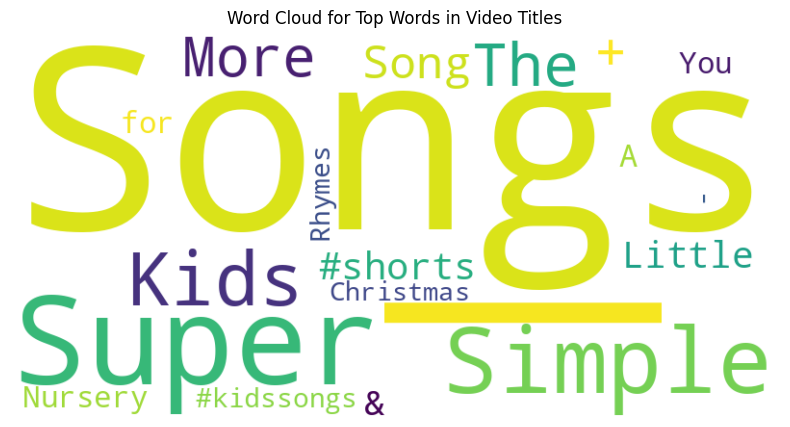

In [52]:
# Plot Word Cloud for Top N Words in Video Titles
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_title_words)
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top Words in Video Titles')
plt.show()

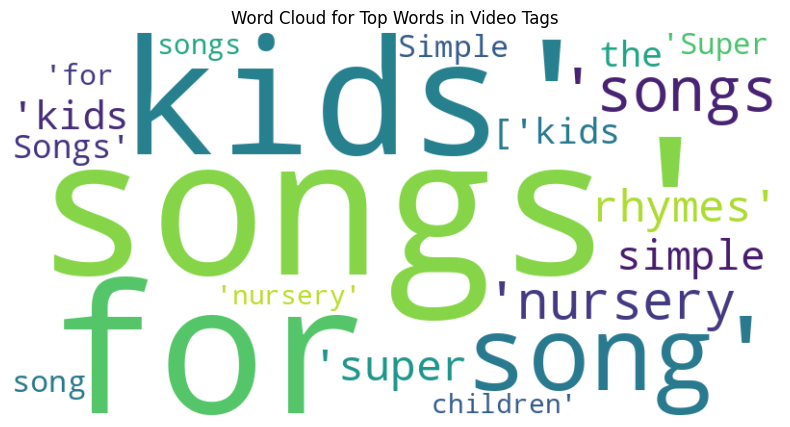

In [53]:
# Plot Word Cloud for Top N Words in Video Tags
tag_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_tag_words)
plt.figure(figsize=(10, 5))
plt.imshow(tag_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top Words in Video Tags')
plt.show()

***Both the word cloud is justified because if we overlook our data set its all about kids poem n all.***

### Task 2
**Visualize the correlation between:**
* Video duration and number of views
* Video duration and number of likes.


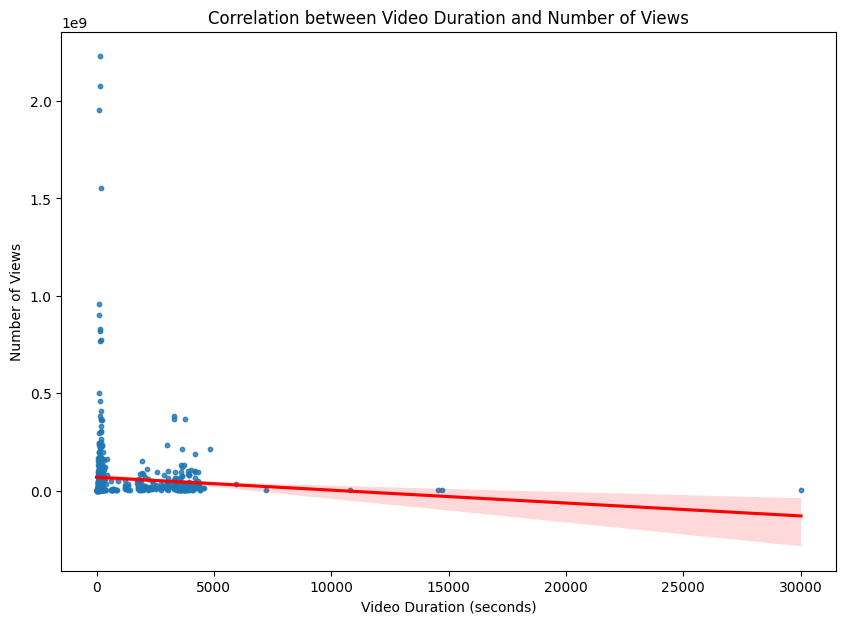

In [54]:
#  Visualize the correlation between video duration and number of views
plt.figure(figsize=(10, 7))
sns.regplot(x='duration_in_seconds', y='viewCount', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Number of Views')
plt.title('Correlation between Video Duration and Number of Views')
plt.show()

* Here 6 vdo's are above 5000 secs duration (outliers) need to be removed.

In [55]:

df_= df.drop(df[df['duration_in_seconds'] > 5000].index)

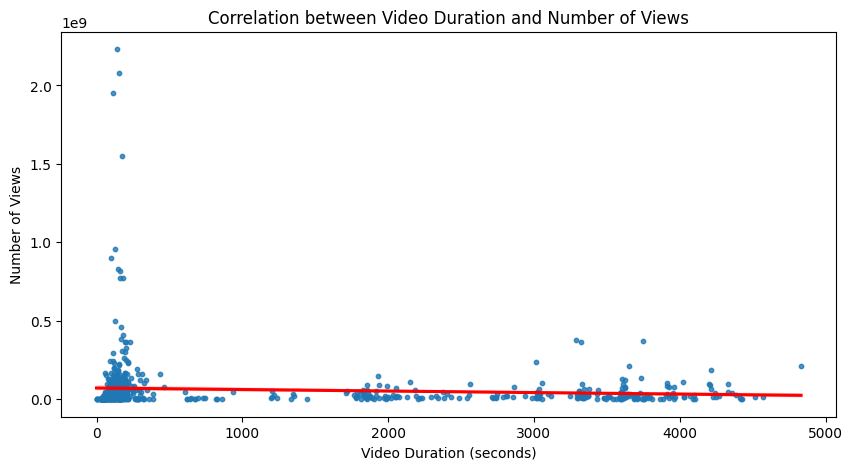

In [56]:
random.seed(0)

# Visualize the correlation between video duration and number of views without outliers
plt.figure(figsize=(10, 5))
sns.regplot(x='duration_in_seconds', y='viewCount', data=df_, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Number of Views')
plt.title('Correlation between Video Duration and Number of Views')
plt.show()

**Certainly, it can be observed that most of the YouTube videos ranging from three to four hundred seconds in duration tend to receive a significant number of views.**

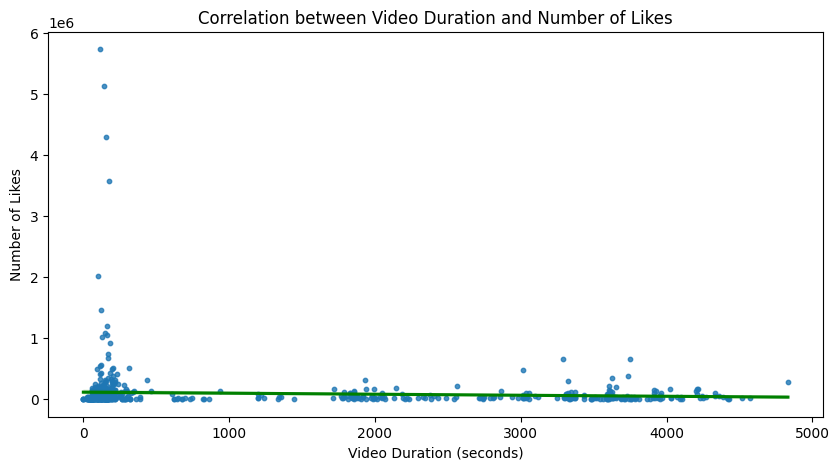

In [57]:
#  Visualize the correlation between video duration and number of likes.
plt.figure(figsize=(10, 5))
sns.regplot(x='duration_in_seconds', y='likeCount', data=df_, scatter_kws={'s':10}, line_kws={'color':'green'})
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Number of Likes')
plt.title('Correlation between Video Duration and Number of Likes')
plt.show()

**And significantly that applies with likes also.**
* In both the cases we can notice in the given dataset the videos around 2000(30mins) secs duration have most likes and views.

### Task 3
Correlation between words in tags and number of views? Like is there any word which is frequently used in most viewed videos?

If there is a cor-relation - try visualizing that.


In [58]:
## TO acieve this we'll lock 1/3 data (most viewed in the given dataset) and will check for most used tags.

# Sort DataFrame by Views to get the most viewed videos
most_viewed_videos = df_.sort_values(by='viewCount', ascending=False).head(250)
most_viewed_videos


,title,tags,duration_in_seconds,viewCount,likeCount,Date of release,# of days,Views per day
0,This Is The Way | Kids Songs | Super Simple Songs,"['This Is The Way', 'Brush Your Teeth', 'Wash ...",139,2230545275,5127752.0,2016-06-08,"2,677",833226
1,Twinkle Twinkle Little Star,"['Toddler Songs', 'nursery', 'BINGO', 'family'...",154,2076801506,4288074.0,2010-09-05,"4,780",434477
2,This Is The Way We Get Dressed | Kids Songs | ...,"['kids songs', 'this is the way', 'this is the...",115,1954188587,5733816.0,2018-02-22,"2,053",951870
3,Five Little Ducks | Kids Songs | Super Simple ...,"['Nursery Rhymes', 'Kids Songs', 'Counting Son...",174,1552746006,3567243.0,2016-09-15,"2,578",602306
4,If You're Happy | Super Simple Songs,"[""If you're angry"", 'Toddler songs', 'Emotions...",124,958985097,1463941.0,2013-11-22,"3,606",265942
...,...,...,...,...,...,...,...,...
245,10 Little Airplanes | Kids Songs | Count To Te...,"['kids songs', 'songs for kids', '10 little ai...",127,40748718,45417.0,2017-06-03,"2,317",17587
246,Everything Is Going To Be Alright | Super Simp...,"['kids songs', 'songs for kids', 'nursery rhym...",194,40631075,47059.0,2020-08-20,"1,143",35548
247,Rain Rain Go Away + More | Nursery Rhymes | Su...,"['rain rain go away', 'nursery', 'rain song', ...",4360,40240058,45807.0,2016-03-23,"2,754",14611
248,"Hello, My Friends | Trick-Or-Treating Song | S...","['Trick Or Treating Song', ""Let's Go Trick Or ...",84,39959803,36629.0,2015-10-07,"2,922",13675


In [59]:
# Extract and tokenize tags from the most viewed videos
most_viewed_tags = ' '.join(most_viewed_videos['tags'].str.replace(',', '')).split()

# Count tag frequencies in the most viewed videos
most_viewed_tag_freq = {word: most_viewed_tags.count(word) for word in set(most_viewed_tags)}

# Find top N most used tags in the most viewed videos
top_n_tags = 15  # Specify the number of top tags to consider
top_tags_most_viewed = dict(sorted(most_viewed_tag_freq.items(), key=lambda x: x[1], reverse=True)[:top_n_tags])
# print(top_tags_most_viewed)

# Print the top N most used tags in the most viewed videos
print(f"Top {top_n_tags} most used tags in the most viewed videos:")
for tag, freq in top_tags_most_viewed.items():
    print(f"{tag}: {freq}")

Top 15 most used tags in the most viewed videos:
for: 618
songs': 530
song': 495
kids': 453
'nursery: 250
'songs: 228
rhymes': 210
the: 182
'kids: 175
'super: 152
simple: 152
Songs': 147
Simple: 143
song: 138
'Super: 136


**As we can expect in the most viewed content**
* { "songs'": 530, "song'": 495, "kids'": 453, "'nursery": 250, "'songs": 228, "rhymes': 210"} thsese tags were used which is very much evident and significant

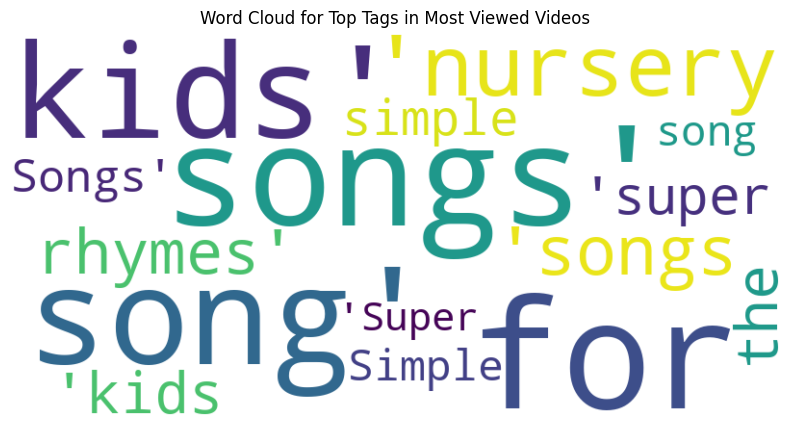

In [60]:
# create a word cloud for these top tags.
random.seed(0)
tag_wordcloud_most_viewed = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_tags_most_viewed)
plt.figure(figsize=(10, 5))
plt.imshow(tag_wordcloud_most_viewed, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top Tags in Most Viewed Videos')
plt.show()

In [ ]:
# Step 1: Sort DataFrame by Views to get the most viewed videos
most_viewed_videos = df.sort_values(by='viewCount', ascending=False)

# Step 2: Extract and tokenize tags from the most viewed videos
most_viewed_tags = ' '.join(most_viewed_videos['tags'].str.replace(',', '')).split()

# Step 3: Count tag frequencies in the most viewed videos
most_viewed_tag_freq = {word: most_viewed_tags.count(word) for word in set(most_viewed_tags)}

# Step 4: Find top N most used tags in the most viewed videos
top_n_tags = 10  # Specify the number of top tags to consider
top_tags_most_viewed = dict(sorted(most_viewed_tag_freq.items(), key=lambda x: x[1], reverse=True)[:top_n_tags])

# Print the top N most used tags in the most viewed videos
print(f"Top {top_n_tags} most used tags in the most viewed videos:")
for tag, freq in top_tags_most_viewed.items():
    print(f"{tag}: {freq}")




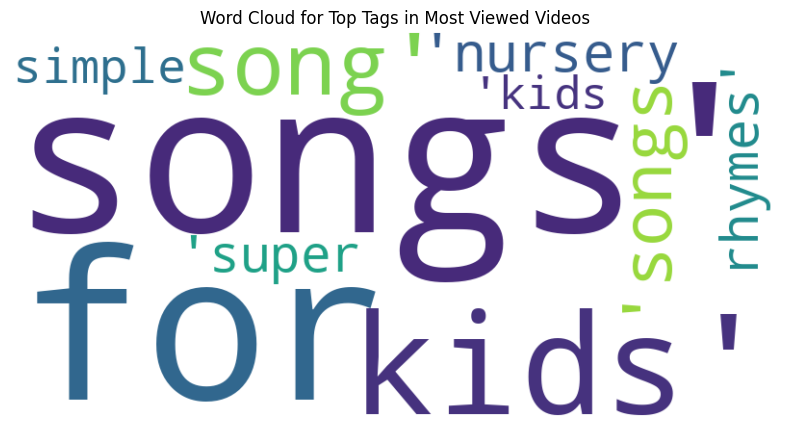

In [63]:
# create a word cloud for these top tags

random.seed(0)
tag_wordcloud_most_viewed = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_tags_most_viewed)
plt.figure(figsize=(10, 5))
plt.imshow(tag_wordcloud_most_viewed, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top Tags in Most Viewed Videos')
plt.show()